# Customer Segmentation

In [2]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
from matplotlib import pyplot as plt
%matplotlib inline
df = pd.read_csv(r"C:\Users\chapp\Downloads\customer.csv")
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,34,Male,18,33,92
1,66,Male,18,48,59
2,92,Male,18,59,41
3,115,Female,18,65,48
4,1,Male,19,15,39


In [3]:
df['Gender'].value_counts()

Female    112
Male       88
Name: Gender, dtype: int64

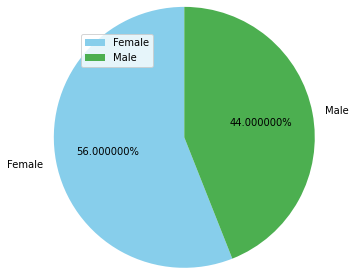

In [4]:
y = np.array([112,88 ])
mylabels = ["Female", "Male"]
mycolors = ["skyblue",  "#4CAF50"]
plt.pie(y, labels = mylabels,colors = mycolors,radius=1.5,startangle = 90,autopct='%f%%')
plt.legend()
plt.show() 

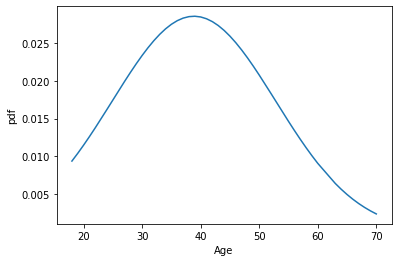

mean: 38.85 
 Standard deviation:
 13.96900733155888


In [5]:
from scipy.stats import norm
import statistics
x_axis = df["Age"]
  
mean = statistics.mean(x_axis)
sd = statistics.stdev(x_axis)
x_axis = df["Age"]  
plt.plot(x_axis, norm.pdf(x_axis, mean, sd))
plt.xlabel("Age")
plt.ylabel("pdf")
plt.show()
print("mean:",mean,"\n","Standard deviation:\n",sd)


plt.show()

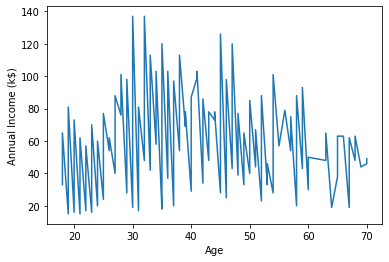

In [7]:
plt.plot(df["Age"],df['Annual Income (k$)'])
plt.xlabel("Age")
plt.ylabel("Annual Income (k$)")
plt.show()
# No corelation between Age,Annual Income

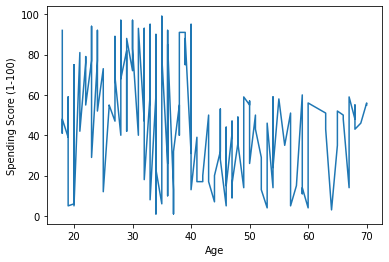

In [8]:
plt.plot(df["Age"],df['Spending Score (1-100)'])
plt.xlabel("Age")
plt.ylabel('Spending Score (1-100)')
plt.show()
# No corelation between Age,Spending Score (1-100)

Text(0, 0.5, 'Spending Score (1-100)')

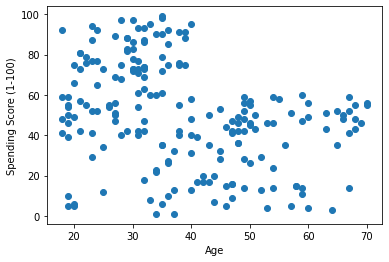

In [9]:
plt.scatter(df["Age"],df['Spending Score (1-100)'])
plt.xlabel('Age')
plt.ylabel('Spending Score (1-100)')

Text(0, 0.5, 'Annual Income (k$)')

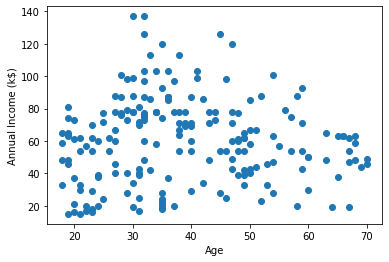

In [10]:
plt.scatter(df["Age"],df['Annual Income (k$)'])
plt.xlabel('Age')
plt.ylabel( 'Annual Income (k$)')

Text(0, 0.5, 'Income($)')

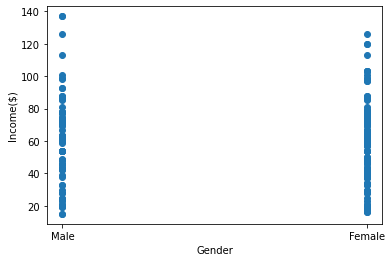

In [11]:
plt.scatter(df["Gender"],df["Annual Income (k$)"])
plt.xlabel('Gender')
plt.ylabel('Income($)')

Text(0, 0.5, 'Spending Score (1-100)')

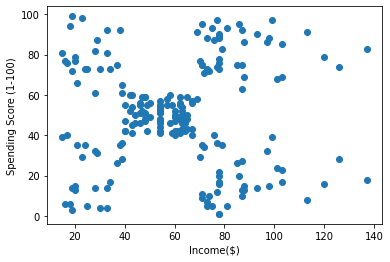

In [12]:
plt.scatter(df["Annual Income (k$)"],df["Spending Score (1-100)"])
plt.xlabel('Income($)')
plt.ylabel('Spending Score (1-100)')

In [13]:
#calculation of errors sum of squared errors
sse = []
k_range = range(1,10)
for k in k_range:
    km = KMeans(n_clusters=k)
    km.fit(df[['Annual Income (k$)','Spending Score (1-100)']])
    sse.append(km.inertia_)
#print sum of squared errors
print("Sse:",sse)

Sse: [269981.27999999997, 181363.59595959593, 106348.37306211119, 73679.78903948836, 44448.45544793371, 37265.86520484346, 30552.714025467285, 25028.02047526941, 21818.11458845218]


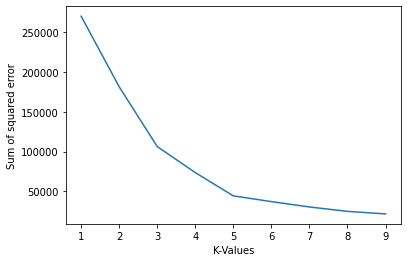

In [14]:
k_range = range(1,10)
plt.xlabel('K-Values')
plt.ylabel('Sum of squared error')
plt.plot(k_range,sse)

In [15]:
km = KMeans(n_clusters=5)
y_predicted = km.fit_predict(df[['Spending Score (1-100)','Annual Income (k$)']])

#y_predicted1 = km.fit_predict(df1[['Spending Score (1-100)','Annual Income (k$)']])
print("Y Predicted\n",y_predicted,"\n","clustercentres:\n",km.cluster_centers_)
u=km.cluster_centers_
df['customer_base_cluster']=y_predicted

Y Predicted
 [3 1 1 1 0 1 1 1 1 1 2 2 0 3 3 1 2 3 3 3 1 1 3 3 1 3 3 3 1 1 2 3 3 3 1 3 1
 2 1 1 1 1 1 1 4 4 1 4 4 4 3 1 4 4 4 3 3 4 4 4 4 4 0 3 1 1 1 4 4 4 1 1 4 4
 4 4 4 4 4 4 2 1 4 2 1 2 4 2 2 0 3 0 3 0 3 4 4 4 0 4 2 2 4 4 0 2 2 1 1 1 4
 4 4 4 4 4 0 1 1 1 4 2 2 2 0 2 1 1 2 2 2 0 1 2 0 1 2 1 1 1 2 2 2 0 1 1 1 2
 0 0 1 1 1 1 1 1 1 1 1 2 1 1 0 2 0 1 0 1 1 2 1 2 1 2 0 2 1 1 2 2 0 1 1 1 1
 0 0 1 1 1 0 1 1 1 1 1 1 1 1 1] 
 clustercentres:
 [[20.91304348 26.30434783]
 [49.51851852 55.2962963 ]
 [17.11428571 88.2       ]
 [79.36363636 25.72727273]
 [82.12820513 86.53846154]]


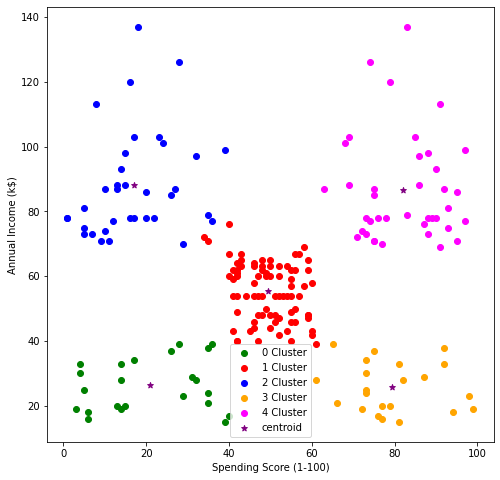

In [16]:
km = KMeans(n_clusters=5)
df1 = df[df.customer_base_cluster==0]
df2 = df[df.customer_base_cluster==1]
df3 = df[df.customer_base_cluster==2]
df4 = df[df.customer_base_cluster==3]
df5 = df[df.customer_base_cluster==4]
plt.figure(figsize=(8,8))
plt.scatter(df1["Spending Score (1-100)"],df1['Annual Income (k$)'],color='green',label='0 Cluster')
plt.scatter(df2["Spending Score (1-100)"],df2['Annual Income (k$)'],color='red',label='1 Cluster')
plt.scatter(df3["Spending Score (1-100)"],df3['Annual Income (k$)'],color='blue',label='2 Cluster')
plt.scatter(df4["Spending Score (1-100)"],df4['Annual Income (k$)'],color='orange',label='3 Cluster')
plt.scatter(df5["Spending Score (1-100)"],df5['Annual Income (k$)'],color='magenta',label='4 Cluster')
#plotting centroids using x,y coordinates
plt.scatter(u[:,0],u[:,1],color='purple',marker='*',label='centroid')
plt.xlabel("Spending Score (1-100)")
plt.ylabel('Annual Income (k$)')
plt.legend()
#plt.legend((df1,df2,df3,df4,df5),('0 Cluster', '1 Cluster','2 Cluster', '3 Cluster', '4 Cluster'),scatterpoints=1)
plt.show()

In [17]:
scaler = MinMaxScaler()

scaler.fit(df[['Annual Income (k$)']])
df['Annual Income (k$)'] = scaler.transform(df[['Annual Income (k$)']])

scaler.fit(df[['Spending Score (1-100)']])
df['Spending Score (1-100)'] = scaler.transform(df[['Spending Score (1-100)']])
scaler.fit(df[['Age']])
df['Age'] = scaler.transform(df[['Age']])
df
#Dataframe after scaling

C:\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:323: DataConversionWarning: Data with input dtype int64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)
C:\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:323: DataConversionWarning: Data with input dtype int64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)
C:\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:323: DataConversionWarning: Data with input dtype int64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),customer_base_cluster
0,34,Male,0.000000,0.147541,0.928571,3
1,66,Male,0.000000,0.270492,0.591837,1
2,92,Male,0.000000,0.360656,0.408163,1
3,115,Female,0.000000,0.409836,0.479592,1
4,1,Male,0.019231,0.000000,0.387755,0
5,62,Male,0.019231,0.254098,0.551020,1
6,69,Male,0.019231,0.270492,0.591837,1
7,112,Female,0.019231,0.393443,0.540816,1
8,114,Male,0.019231,0.401639,0.459184,1
9,116,Female,0.019231,0.409836,0.500000,1


In [18]:
#for k=3 getting predicted clusters
km = KMeans(n_clusters=3)
y_predicted = km.fit_predict(df[['Annual Income (k$)','Spending Score (1-100)']])
print(y_predicted)


[2 2 2 2 2 2 2 2 2 2 1 1 1 2 2 2 1 2 2 2 2 2 2 2 2 2 2 2 2 2 1 2 2 2 2 2 1
 1 2 2 2 2 2 2 0 0 1 0 0 0 2 2 0 0 0 2 2 0 0 0 0 0 2 2 2 2 2 0 0 0 2 2 0 0
 0 0 0 0 0 0 1 2 0 1 2 1 0 1 1 1 2 2 2 2 2 0 0 0 2 0 1 1 0 0 1 1 1 2 2 2 0
 0 0 0 0 0 2 2 2 2 0 1 1 1 1 1 2 1 1 1 1 2 2 1 1 2 1 2 2 2 1 1 1 2 2 2 2 1
 1 2 2 2 2 2 2 2 2 2 2 1 2 2 2 1 1 2 1 2 2 1 2 1 2 1 1 1 2 2 1 1 1 2 2 2 2
 1 2 2 2 2 1 2 2 2 2 2 2 2 2 2]


In [20]:
#calculation of errors sum of squared errors
sse = []
k_range = range(1,10)
for k in k_range:
    km = KMeans(n_clusters=k)
    km.fit(df[['Annual Income (k$)','Spending Score (1-100)']])
    sse.append(km.inertia_)
#print sum of squared errors
print("Sse:",sse)

Sse: [23.04072032603991, 13.993505283127977, 9.058985215159455, 6.110312266413655, 3.5831179059525606, 3.098385141882586, 2.641641737655628, 2.2202366688882824, 1.8753382288473202]


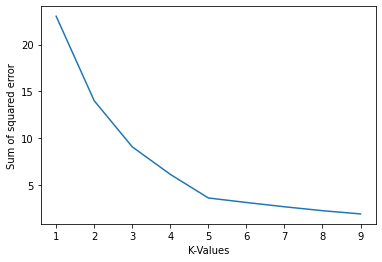

In [21]:
k_range = range(1,10)
plt.xlabel('K-Values')
plt.ylabel('Sum of squared error')
plt.plot(k_range,sse)

In [ ]:
#From the above plot k=5 suits best for the given dataset

In [22]:
km = KMeans(n_clusters=5)
y_predicted = km.fit_predict(df[['Spending Score (1-100)','Annual Income (k$)']])

#y_predicted1 = km.fit_predict(df1[['Spending Score (1-100)','Annual Income (k$)']])
print("Y Predicted\n",y_predicted,"\n","clustercentres:\n",km.cluster_centers_)
u=km.cluster_centers_

Y Predicted
 [0 4 4 4 3 4 4 4 4 4 2 2 3 0 0 4 2 0 0 0 4 4 0 0 4 0 0 0 4 4 2 0 0 0 4 0 4
 2 4 4 4 4 4 4 1 1 4 1 1 1 0 4 1 1 1 0 0 1 1 1 1 1 3 0 4 4 4 1 1 1 4 4 1 1
 1 1 1 1 1 1 2 4 1 2 4 2 1 2 2 3 0 3 0 3 0 1 1 1 3 1 2 2 1 1 3 2 2 4 4 4 1
 1 1 1 1 1 3 4 4 4 1 2 2 2 3 2 4 4 2 2 2 3 4 2 3 4 2 4 4 4 2 2 2 3 4 4 4 2
 3 3 4 4 4 4 4 4 4 4 4 2 4 4 3 2 3 4 3 4 4 2 4 2 4 2 3 2 4 4 2 2 3 4 4 4 4
 3 3 4 4 4 3 4 4 4 4 4 4 4 4 4] 
 clustercentres:
 [[0.79962894 0.08792846]
 [0.82783883 0.58638083]
 [0.16443149 0.6       ]
 [0.20319432 0.09265859]
 [0.49508692 0.33029751]]


In [23]:
df['customer_base_cluster']=y_predicted
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),customer_base_cluster
0,34,Male,0.000000,0.147541,0.928571,0
1,66,Male,0.000000,0.270492,0.591837,4
2,92,Male,0.000000,0.360656,0.408163,4
3,115,Female,0.000000,0.409836,0.479592,4
4,1,Male,0.019231,0.000000,0.387755,3


In [24]:
print(u)

[[0.79962894 0.08792846]
 [0.82783883 0.58638083]
 [0.16443149 0.6       ]
 [0.20319432 0.09265859]
 [0.49508692 0.33029751]]


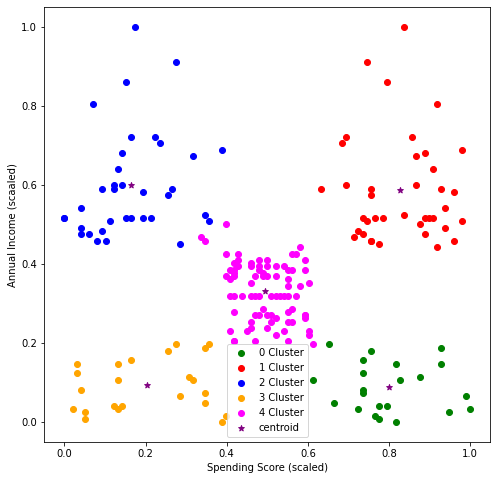

In [25]:
km = KMeans(n_clusters=5)
df1 = df[df.customer_base_cluster==0]
df2 = df[df.customer_base_cluster==1]
df3 = df[df.customer_base_cluster==2]
df4 = df[df.customer_base_cluster==3]
df5 = df[df.customer_base_cluster==4]
plt.figure(figsize=(8,8))
plt.scatter(df1["Spending Score (1-100)"],df1['Annual Income (k$)'],color='green',label='0 Cluster')
plt.scatter(df2["Spending Score (1-100)"],df2['Annual Income (k$)'],color='red',label='1 Cluster')
plt.scatter(df3["Spending Score (1-100)"],df3['Annual Income (k$)'],color='blue',label='2 Cluster')
plt.scatter(df4["Spending Score (1-100)"],df4['Annual Income (k$)'],color='orange',label='3 Cluster')
plt.scatter(df5["Spending Score (1-100)"],df5['Annual Income (k$)'],color='magenta',label='4 Cluster')
#plotting centroids using x,y coordinates
plt.scatter(u[:,0],u[:,1],color='purple',marker='*',label='centroid')
plt.xlabel("Spending Score (scaled)")
plt.ylabel('Annual Income (scaaled)')
plt.legend()
#plt.legend((df1,df2,df3,df4,df5),('0 Cluster', '1 Cluster','2 Cluster', '3 Cluster', '4 Cluster'),scatterpoints=1)
plt.show()

In [26]:
x1=df["Spending Score (1-100)"][190:].values.tolist()
y1=df['Annual Income (k$)'][190:].values.tolist()
m=[]
for i in range(len(x1)):
    x=x1[i]
    y=y1[i]
    mind=((x-u[0][0])**2+(y-u[0][1])**2)**0.5
    mindex=0
    for j in range(1,len(u)):
        d=((x-u[j][0])**2+(y-u[j][1])**2)**0.5
        if d<=mind:
            mind=d
            mindex=j
    m.append(mindex)
print(m)   

[3, 4, 4, 4, 4, 4, 4, 4, 4, 4]


In [27]:
x1=df.customer_base_cluster[190:].values.tolist()
print(x1)

[3, 4, 4, 4, 4, 4, 4, 4, 4, 4]


In [28]:
#As it is unsupervised method,we have to manually calculate Accuraacy
c=0
for i in range(len(x1)):
    if m[i]==x1[i]:
        c+=1
print("Accuracy:",c/(len(x1)))
    

Accuracy: 1.0


In [29]:
# customers with spending score between 0-40 and annual income below 40k$ will be under one cluster, customers with spending score between 40-60 and annual income from 40-65k$ will be under one cluster, customers with spending score 60 to 100 and annual income 40k$ will come under one cluster, customers with spending score from 0 to 40 and annual income from 65 to 137k$ will come under one cluster, customers with spending score 60 to 100 and annual income from 65 to 137k$ will come under one cluster